In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

from genetic import GeneticExtractor

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

np.random.seed(1337)  # Random seed for reproducibility

from tslearn.datasets import UCR_UEA_datasets

In [2]:
# Load ItalyPowerDemand dataset
X_train, y_train, X_test, y_test = UCR_UEA_datasets().load_dataset('ItalyPowerDemand')
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1]))

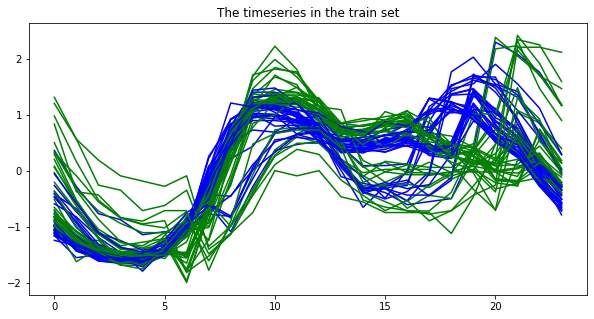

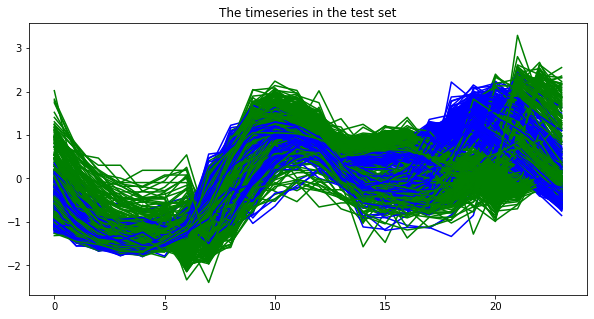

In [3]:
# Visualize the timeseries in the train and test set
colors = ['r', 'b', 'g', 'y', 'c']

plt.figure(figsize=(10, 5))
for ts, label in zip(X_train, y_train):
    plt.plot(range(len(ts)), ts, c=colors[label%len(colors)])
plt.title('The timeseries in the train set')
plt.show()

plt.figure(figsize=(10, 5))
for ts, label in zip(X_test, y_test):
    plt.plot(range(len(ts)), ts, c=colors[label%len(colors)])
plt.title('The timeseries in the test set')
plt.show()

it		avg		std		max		time
1		-0.3175		0.094		-0.168038	1.4162
2		-0.2945		0.075		-0.168038	1.3347
3		-0.2538		0.068		-0.168038	1.3205
4		-0.2152		0.053		-0.135597	1.2186
5		-0.1748		0.033		-0.135597	1.0508
6		-0.1675		0.038		-0.135597	1.2958
7		-0.1548		0.034		-0.126331	1.1666
8		-0.1439		0.017		-0.126331	1.3096
9		-0.1359		0.011		-0.118418	1.8657
10		-0.1303		0.018		-0.085583	2.3487


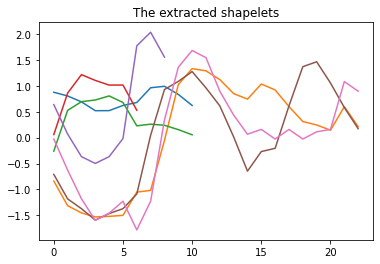

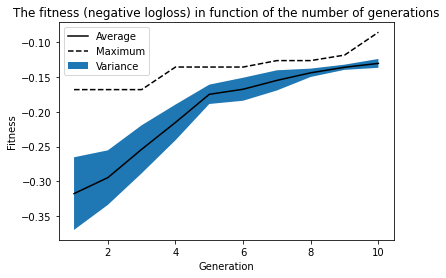

In [4]:
# Extract the shapelets using the train set. Enabled verbosity. 
# Plotting is possible too, by setting plot='notebook' in jupyter or True else
genetic_extractor = GeneticExtractor(verbose=True, population_size=50, iterations=10, plot=None)
genetic_extractor.fit(X_train, y_train)

plt.figure()
for shap in genetic_extractor.shapelets:
    plt.plot(shap)
plt.title('The extracted shapelets')
plt.show()

x, y, y_err, y_max = [], [], [], []
for it, stat in genetic_extractor.history:
    x.append(it)
    y.append(stat['avg'])
    y_err.append(stat['std'] ** 1.25)
    y_max.append(stat['max'])
x, y, y_err, y_max = np.array(x), np.array(y), np.array(y_err), np.array(y_max)

plt.plot(x, y, 'k-', label='Average')
plt.fill_between(x, y-y_err, y+y_err, label='Variance')
plt.plot(x, y_max, 'k--', label='Maximum')
plt.title('The fitness (negative logloss) in function of the number of generations')
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.legend()
plt.show()

In [5]:
# Calculate distances from timeseries to extracted shapelets and fit a Logistic Regression model
distances_train = genetic_extractor.transform(X_train)
distances_test = genetic_extractor.transform(X_test)

lr = LogisticRegression(random_state=2020)
lr.fit(distances_train, y_train)

# Print the accuracy score on the test set
print('Accuracy LR = {}'.format(accuracy_score(y_test, lr.predict(distances_test))))

Accuracy LR = 0.9630709426627794
